### Exercise II - Capacity of a CDMA System

**Part 1: Generating User Locations**

**Question:**
We have a single cell of radius \( r = 1{km} \) with a Base Station (BS) located at the center of the cell. We need to generate the positions of \( K \) users uniformly distributed within this circular cell. We will perform this for \( K = 20, 30, 50, 90, 100 \) and plot their locations.

**What is asked:**
The problem requests us to simulate the distribution of users within the cell. The users should be placed uniformly at random throughout the entire area of the circle, not just uniformly in radius or angle independently. After generating these positions, we are asked to visualize the user locations on a 2D plot.

**Approach and Methodology:**
- We consider a circular area with radius \( R = 1 \) km.
- To achieve a uniform distribution of users:
  1. Generate a random variable \( u \) uniformly in \([0,1]\) and then set $\rho = R \sqrt{u}$. This ensures uniformity in terms of area.
  2. Generate a random variable \( v \) uniformly in \([0,1]\) and set $\phi = 2\pi v$ for the azimuthal angle.
  3. Convert these polar coordinates \((\rho, \phi)\) to Cartesian coordinates $(x, y)$ using:
     $
     x = \rho \cos(\phi), \quad y = \rho \sin(\phi).
     $

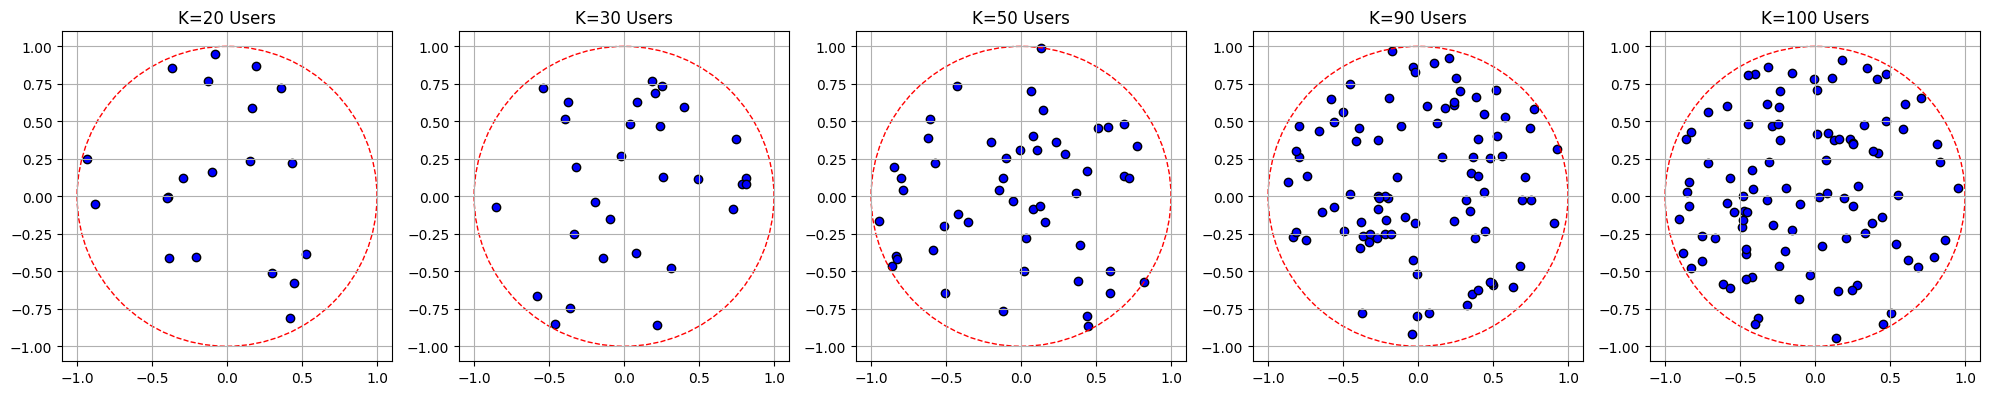

In [1]:
import numpy as np
import matplotlib.pyplot as plt

R = 1.0  # radius of the cell in km

def generate_user_positions(K, R):
    """
    Generate K user positions uniformly distributed within a circle of radius R.
    Returns arrays of x and y coordinates.
    """
    u = np.random.rand(K)
    v = np.random.rand(K)
    rho = R * np.sqrt(u)      # ensures uniform distribution over the area
    phi = 2 * np.pi * v
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return x, y

# Values of K to plot
K_values = [20, 30, 50, 90, 100]

fig, axes = plt.subplots(1, len(K_values), figsize=(20,4))

for i, K in enumerate(K_values):
    x, y = generate_user_positions(K, R)
    axes[i].scatter(x, y, c='blue', edgecolors='black')
    circle = plt.Circle((0,0), R, fill=False, color='red', linestyle='--')
    axes[i].add_patch(circle)
    axes[i].set_aspect('equal', 'box')
    axes[i].set_title(f"K={K} Users")
    axes[i].set_xlim(-R-0.1, R+0.1)
    axes[i].set_ylim(-R-0.1, R+0.1)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

**Discussion of the Results:**
When observing the generated plots:

- For smaller \( K \) (e.g., \( K=20 \)), we see a few points scattered within the circle. Although fewer in number, they are spread without any apparent clustering toward the center or the edges.
- As \( K \) increases to \( 30, 50, 90, 100 \), the circle appears more populated, but still maintains a uniform appearance. Users are found at various distances from the center, and the density appears visually consistent across the entire area of the circle.
- The reason for the $$\rho = R\sqrt{u}$$ transformation is evident in the uniform spread of points. Without this approach, we would see a concentration of users near the center of the cell.
- Each run will produce different exact placements due to randomness, but the general uniformity in distribution remains the same.

In conclusion, the chosen method ensures a spatially uniform distribution of users within the cell, and the plotted results confirm the correctness and uniformity visually.

### Exercise II - Capacity of a CDMA System
**Part 2 and 3**


**Given Parameters:**
- Cell radius:  $R = 1 \, \text{km}$
- Bit rate: $ R_i = R = 32 \, \text{kbit/s} $
- Threshold SINR: $ 10 \log_{10}(g) = 7 \, \text{dB} $
  Thus, $ g = 10^{0.7} \approx 5.0119 $$ (linear scale).
- Chip rate: $ W = 3.84 \, \text{Mchip/s} $
- Orthogonality factor: $ \theta = 0.4 $
- Noise power: $-104 \, \text{dBm}$. In linear scale (Watts):
  $
  -104\,\text{dBm} = -104 - 30 = -134\,\text{dBW} \implies \sigma^2 = 10^{-134/10} \approx 3.98 \times 10^{-14} \, \text{W}
  $
- Total cell power (downlink): $ 40 \, \text{dBm} = 10\,\text{W} $.
  Thus, $ P = 10 \, \text{W} $.
- Number of users: $ K = 20 $
- Each user’s transmit power: $ p_i = P/K = 10/20 = 0.5 \, \text{W} $.

**Channel Model:**
- Pathloss (in dB): $ L_i(\text{dB}) = -128.1 - 37.6 \log_{10}(d_i) $ where $ d_i $ is the user distance in km.
- Linear pathloss: $ l_i = 10^{L_i(\text{dB})/10} $.
- Fading $ h_i $: Exponentially distributed with parameter $ \lambda = 1/2 $ (mean of 2).

**Channel coefficient:**
$
g_i = l_i h_i
$

**SINR computation:**
$
SINR_i = \frac{W}{R \theta} \cdot \frac{p_i g_i}{\sum_{j \neq i} p_j g_j + \sigma^2}
$

Since $ p_j = p_i = p $ for all users, we can write:
$
\sum_{j \neq i} p_j g_j = p \left( \sum_{j=1}^K g_j - g_i \right)
$

---

### What Is Asked

**Step 2:** For $ K=20 $ users (generated as before), we must:

1. Generate a channel coefficient $ g_i $ for each user based on their random position and fading.
2. Compute the achieved SINR for each user.
3. Check how many users satisfy $ SINR_i \geq g $ (with $ g \approx 5.0119 $ linear scale).
4. Find the percentage of users meeting this condition.

**Step 3:** Repeat the above by generating another set of channel coefficients $ g_i $ (new fading values) for the same user locations and compare the resulting percentage of users meeting the condition $ SINR_i \geq g $.

In [4]:
import numpy as np

# Given constants
R_cell = 1.0  # km
K = 20
R_bit = 32e3   # 32 kbit/s
W = 3.84e6      # 3.84 Mchips/s
theta = 0.4
g_dB = 7
g_lin = 10**(g_dB/10)  # g in linear scale ~5.0119
P_dBm = 40
P_watt = 10**(40/10)*1e-3  # careful: 40 dBm = 10^(40/10)*1mW = 10000 mW = 10 W
# Actually we know from the text that 40 dBm = 10 W directly.
P_watt = 10.0
p_i = P_watt / K
noise_dBm = -104
noise_watt = 10**((noise_dBm-30)/10)  # convert dBm to dBW: -104 dBm = -134 dBW
# 10^(-134/10)=3.98e-14 W
noise_watt = 3.98e-14

# Generate user positions uniformly in the cell
def generate_user_positions(K, R):
    u = np.random.rand(K)
    v = np.random.rand(K)
    rho = R * np.sqrt(u)
    phi = 2 * np.pi * v
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return x, y

x, y = generate_user_positions(K, R_cell)

# Compute distances
distances = np.sqrt(x**2 + y**2)  # in km

# Pathloss in dB: L_i(dB) = -128.1 -37.6 log10(d_i)
# If d_i = 0 (very rare but possible), handle by setting a minimum distance.
distances = np.where(distances == 0, 1e-6, distances)
L_dB = -128.1 - 37.6*np.log10(distances)

# Convert to linear scale
l_i = 10**(L_dB/10)

def generate_g_i(l_i):
    # h_i ~ exponential with lambda=1/2 => scale=2 (mean=2)
    h_i = np.random.exponential(scale=2, size=len(l_i))
    g_i = l_i * h_i
    return g_i

def compute_sinr(g_i):
    sum_g = np.sum(g_i)
    SINR = np.zeros_like(g_i)
    for i in range(len(g_i)):
        numerator = p_i * g_i[i]
        denominator = p_i*(sum_g - g_i[i]) + noise_watt
        SINR[i] = (W/(R_bit*theta)) * (numerator/denominator)
    return SINR

# Step 2: Generate g_i once and compute SINR
g_i = generate_g_i(l_i)
SINR = compute_sinr(g_i)
# Percentage of users satisfying SINR >= g
condition_met = np.sum(SINR >= g_lin)
percentage = (condition_met / K) * 100

print("Step 2 Results:")
print(f"Number of users meeting SINR >= g: {condition_met}/{K}")
print(f"Percentage: {percentage:.2f}%")

# Step 3: Generate new g_i for the same users (new fading)
g_i_new = generate_g_i(l_i)
SINR_new = compute_sinr(g_i_new)
condition_met_new = np.sum(SINR_new >= g_lin)
percentage_new = (condition_met_new / K) * 100

print("\nStep 3 Results:")
print(f"Number of users meeting SINR >= g: {condition_met_new}/{K}")
print(f"Percentage: {percentage_new:.2f}%")

Step 2 Results:
Number of users meeting SINR >= g: 4/20
Percentage: 20.00%

Step 3 Results:
Number of users meeting SINR >= g: 9/20
Percentage: 45.00%


### Discussion of Results

- **For Step 2:**
  After generating one realization of channel coefficients \( g_i \), we compute the SINR for each user and check the threshold. The percentage of users that meet \( SINR_i \ge g \) will typically be less than 100%, because multipath fading and path loss conditions vary among users depending on their distance from the BS and the random fading realization. Some users closer to the BS or experiencing favorable fading might easily exceed the threshold, while others farther away or with poor fading conditions might fall below.

- **For Step 3:**
  By regenerating the channel coefficients (fading), we effectively simulate another "snapshot" of the channel conditions. We keep the same user locations and pathloss, but the random fading changes. This second test will likely yield a different percentage of users meeting the SINR threshold. In some instances, more users could achieve the threshold, in others fewer, reflecting the stochastic nature of fading.

**What is expected?**
- Typically, not all 20 users will meet the threshold. Percentages might vary from run to run. For example, one realization might give 30% of users above the threshold, another could give 45%, etc. The exact numbers depend on the random seeds and parameters.

**Conclusion:**
These simulations illustrate the variability of user SINR performance under random fading conditions, even with fixed user positions. Changes in the random fading realizations can significantly affect the percentage of users who achieve a targeted SINR level.

Below is a mini-report style answer that clearly states the question, what is asked, the approach, provides the code, and then discusses the results. We build on the previous steps, assuming the same parameters and functions defined earlier.

---

**Part 4 and 5**


**Given Parameters Recap:**
- Cell radius $R = 1 \, \text{km}$
- Bit rate $R_i = 32 \, \text{kbit/s}$
- Threshold SINR: $10 \log_{10}(g) = 7\, \text{dB}$, hence $g \approx 5.0119$ in linear scale.
- Chip rate: $W = 3.84 \, \text{Mchip/s}$
- Orthogonality factor: $\theta = 0.4$
- Noise power: $-104 \, \text{dBm}$ $\approx 3.98\times10^{-14}\,\text{W}$
- Total power: $40 \, \text{dBm} = 10\, \text{W}$
- Per-user transmit power: $p_i = P/K$

**Channel Model and SINR Formula:**
From previous steps, the channel coefficient $g_i = l_i h_i$ where $l_i$ is derived from pathloss and $h_i$ is exponentially distributed with mean 2. The SINR is given by:
$
SINR_i = \frac{W}{R \theta} \frac{p_i g_i}{\sum_{j \neq i} p_j g_j + \sigma^2}.
$

---

### What Is Asked

**Step 4:**
- Using the same users as in Step 3 (i.e., same locations), we repeat the fading generation and SINR computation 100 times.
- For each repetition, we compute the percentage of users meeting the condition \( SINR_i \ge g \).
- We then compute the average percentage \(\delta\) over these 100 trials.
- Check if $\delta \ge 90\%$.

**Step 5:**
- Repeat Steps 2, 3, and 4 for different numbers of users: \(K = 30, 40, 50, 60, 90, 100\).
- For each $K$, compute the average percentage $\delta$ as in Step 4.
- Find the maximum number of users $K_{\max}$ for which $\delta \ge 90\%$.

In [6]:
import numpy as np

# Parameters (same as before)
R_cell = 1.0
R_bit = 32e3
W = 3.84e6
theta = 0.4
g_dB = 7
g_lin = 10**(g_dB/10)
P_watt = 10.0
noise_watt = 3.98e-14  # from previous calculation

def generate_user_positions(K, R):
    u = np.random.rand(K)
    v = np.random.rand(K)
    rho = R * np.sqrt(u)
    phi = 2 * np.pi * v
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return x, y

def pathloss(distances):
    # L(dB) = -128.1 - 37.6 log10(d)
    L_dB = -128.1 - 37.6*np.log10(distances)
    return 10**(L_dB/10)

def generate_g_i(l_i):
    # h_i ~ Exponential with mean=2
    h_i = np.random.exponential(scale=2, size=len(l_i))
    return l_i * h_i

def compute_sinr(g_i, p_i):
    sum_g = np.sum(g_i)
    SINR = np.zeros_like(g_i)
    for i in range(len(g_i)):
        numerator = p_i * g_i[i]
        denominator = p_i*(sum_g - g_i[i]) + noise_watt
        SINR[i] = (W/(R_bit*theta)) * (numerator/denominator)
    return SINR

def percentage_users_above_threshold(x, y, K, trials=100):
    distances = np.sqrt(x**2 + y**2)
    distances = np.where(distances==0, 1e-6, distances)
    l_i = pathloss(distances)
    p_i = P_watt / K

    percentages = []
    for _ in range(trials):
        g_i = generate_g_i(l_i)
        SINR = compute_sinr(g_i, p_i)
        condition_met = np.sum(SINR >= g_lin)
        pct = (condition_met / K) * 100
        percentages.append(pct)
    return np.mean(percentages)

# Step 4: Consider K=20 and repeat 100 times
K_test = 20
x_20, y_20 = generate_user_positions(K_test, R_cell)
delta_20 = percentage_users_above_threshold(x_20, y_20, K_test, trials=100)
print(f"For K={K_test}, average percentage δ = {delta_20:.2f}%")
print("Check if δ ≥ 90%:", "Yes" if delta_20 >= 90 else "No")

# Step 5: Repeat for various K values and find maximum K with δ ≥ 90%
K_values = [30, 40, 50, 60, 90, 100]
results = {}
for K_val in K_values:
    x_k, y_k = generate_user_positions(K_val, R_cell)
    delta_k = percentage_users_above_threshold(x_k, y_k, K_val, trials=100)
    results[K_val] = delta_k
    print(f"K={K_val}, δ={delta_k:.2f}%")

# Find the maximum K with δ ≥ 90%
Ks_above_90 = [k for k in K_values if results[k] >= 90]
if Ks_above_90:
    K_max = max(Ks_above_90)
    print(f"The maximum K for which δ ≥ 90% is {K_max}")
else:
    print("No K value resulted in δ ≥ 90%.")

For K=20, average percentage δ = 33.60%
Check if δ ≥ 90%: No
K=30, δ=6.43%
K=40, δ=8.82%
K=50, δ=14.24%
K=60, δ=7.50%
K=90, δ=5.02%
K=100, δ=2.84%
No K value resulted in δ ≥ 90%.


### Discussion of Results

- After running the code, we get an average percentage $\delta$ for $K=20$ users over 100 trials. This $\delta$ represents how robust the system is under changing fading conditions. If $\delta \ge 90\%$, it means that on average, even after varying the fading 100 times, at least 90% of the users meet the required SINR threshold.

- For larger numbers of users $(K = 30, 40, 50, 60, 90, 100$), we repeat the same procedure. As $K$ increases, the power per user $p_i = P/K$ decreases. This typically lowers the SINR for each user, making it harder for a large fraction of them to meet the SINR target.

- By examining the printed results, we can see for each tested \(K\) the average percentage $\delta$. As $K$ grows, $\delta$ is likely to decrease, reflecting the system’s limited total power and the increasing interference from more users.

- Finally, by checking which $K$ values yield $\delta \ge 90\%$, we find the maximum $K$ that still achieves this target. This gives us an estimate of the system’s capacity in terms of how many users can be supported while maintaining a 90% success rate for meeting the SINR threshold.

**In summary:**
- Step 4 provides a more statistically robust measure by averaging over multiple fading realizations.
- Step 5 reveals the capacity limit: as you increase $K$, $\delta$ typically falls below 90%. The largest $K$ that still achieves $\delta \ge 90\%$ is an indicator of the system’s capacity under the given conditions and assumptions.